In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cargar los datos desde el archivo CSV
file_path = 'C:/Users/carlo/samsung.csv'
df = pd.read_csv(file_path)

In [35]:
df

,Date,Close,Volume
0,02/01/2008,10880,18047200
1,03/01/2008,10920,19346500
2,04/01/2008,10780,17997350
3,07/01/2008,10380,39787200
4,08/01/2008,10320,24783700
...,...,...,...
2845,24/06/2019,45500,6085066
2846,25/06/2019,45600,7076774
2847,26/06/2019,45700,9226097
2848,27/06/2019,46500,12603534


In [25]:
# Seleccionar las columnas relevantes
X = df[['Close', 'Volume']]

In [26]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Generar la gráfica de codo para determinar el número óptimo de clusters
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i, random_state=42) for i in Nc]
inertia = [kmeans[i].fit(X_scaled).inertia_ for i in range(len(kmeans))]

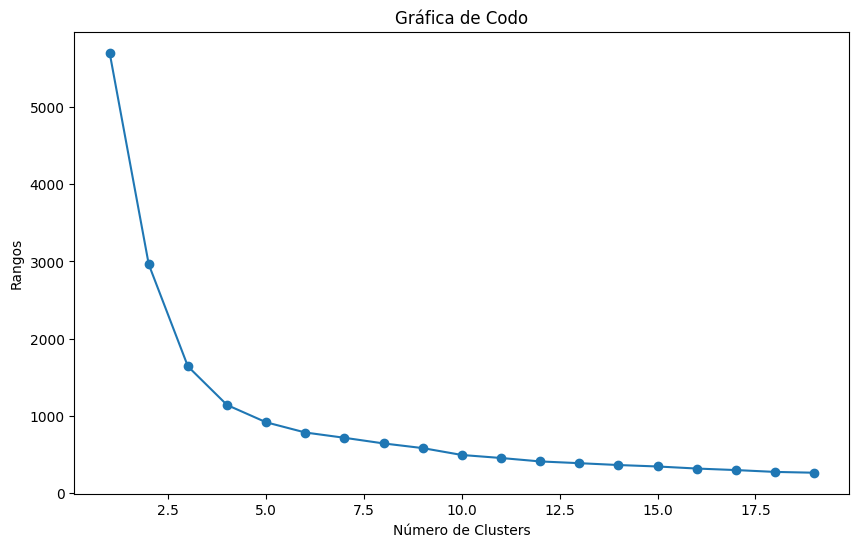

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(Nc, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Rangos')
plt.title('Gráfica de Codo')
plt.show()

In [29]:
# Implementar K-Means con el número óptimo de clusters basado en la gráfica del codo
optimal_k = 3  # Por ejemplo, si el codo está en k=3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [30]:
# Agregar la etiqueta de cluster al DataFrame original
df['Cluster'] = kmeans.labels_

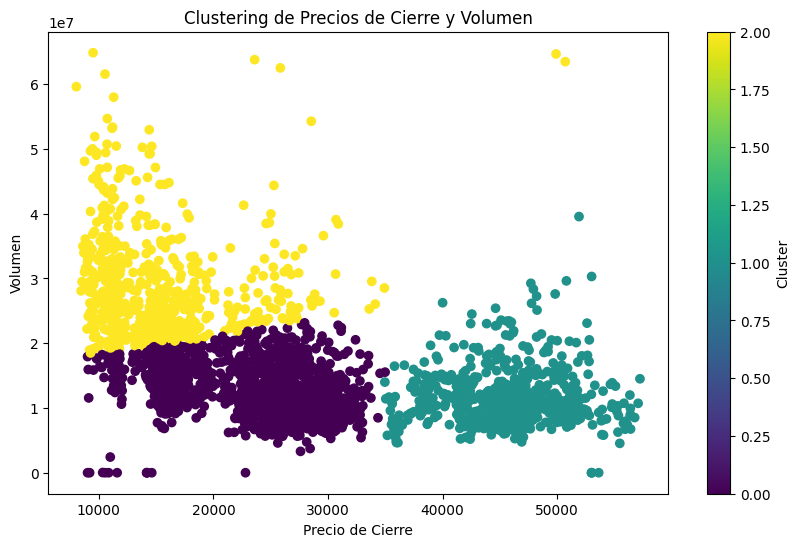

In [33]:
# Gráfica personalizada: Close vs Volume con los clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Close'], df['Volume'], c=df['Cluster'], cmap='viridis')
plt.title('Clustering de Precios de Cierre y Volumen')
plt.xlabel('Precio de Cierre')
plt.ylabel('Volumen')
plt.colorbar(label='Cluster')
plt.show()